In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                 
import seaborn as sns 
import sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
df = pd.read_csv("sensor.csv")

In [3]:
## shuffling the dataset
# df = df.sample(frac = 1)

In [4]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [8]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [9]:
df.shape

(220320, 55)

#### EDA

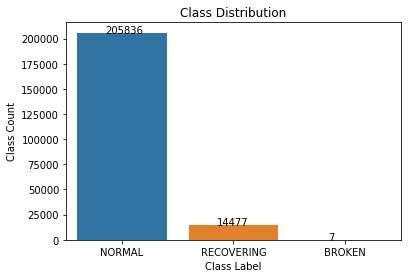

In [10]:
## function to plot class distribution

def get_class_distribution(df, col=None):
    if col=='machine_status':
        label_count=df['machine_status'].value_counts()
    elif col == 'label': # if column = label
        label_count = df['label'].value_counts()
    else:
        label_count = df.value_counts()
    
    plot=sns.barplot(list(label_count.index), list(label_count.values))
    plt.title('Class Distribution')
    plt.xlabel('Class Label')
    plt.ylabel('Class Count')

    for patch in plot.patches:
        plot.annotate('{:n}'.format(patch.get_height()), 
                      (patch.get_x()+0.25, patch.get_height()+1))
    plt.show()

get_class_distribution(df,'machine_status')

### Machine status

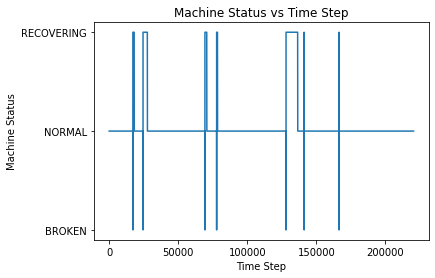

In [11]:
# label encoding
le = preprocessing.LabelEncoder() # creating label encoder
y = le.fit_transform(df['machine_status']) # fitting on labels
x = list(df.index)
plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = list(le.transform(list(le.classes_))) # encoded labels
labels = list(le.classes_) # labels
plt.yticks(encode_labels, labels)
plt.show()

- From the above state we can see that the recovering state follow a broken state
- In Recovering State pump is trying to recover from the broken state
- So recovering state is also considered as broken state

In [12]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [13]:
### Relabelling the data

## encoding labels as 0 and 1
## 0=normal
## 1 = broken

# df['label']=df['machine_status'].map(lambda label : 0 if label=='NORMAL' else 1)

# print('Class distribution after relabelling the data')
# get_class_distribution(df, 'label')

# print('-'*70)

# ## Changing the machine status from recoverring to broken

# df['new_machine_status'] = df['machine_status'].map(lambda label : 'BROKEN' if label != 'NORMAL' else 'NORMAL')

# print('Machie Status after Re-labelling the data')

# x = list(df.index)
# y = list(df['machine_status'].map(lambda label : 1 if label==0 else 0))

# plt.plot(x, y)
# plt.xlabel('Time Step')
# plt.ylabel('Machine Status')
# plt.title('Machine Status vs Time Step')

# encode_labels = [0, 1] # encoded labels
# labels = ['BROKEN', 'NORMAL'] # labels 
# plt.yticks(encode_labels, labels)
# plt.show()

Class distribution after re-labeling the data



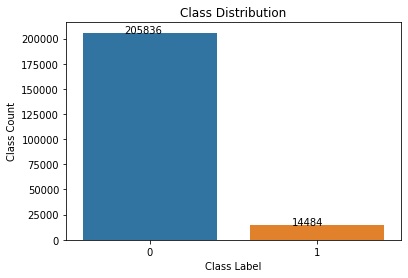

----------------------------------------------------------------------
Machine status after re-labeling the data



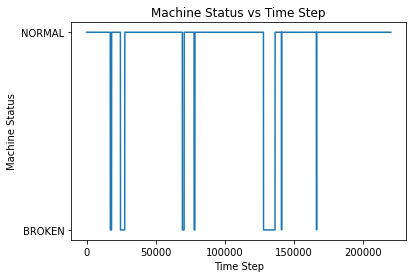

In [14]:

df['label'] = df['machine_status'].map(lambda label: 0 if label == 'NORMAL' else 1) 
print("Class distribution after re-labeling the data")
print()
get_class_distribution(df, 'label')
print('-'*70)

# changing machine status recovery to broken
df['new_machine_status'] = df['machine_status'].map(lambda 
                        label:  'BROKEN' if label != 'NORMAL' else 'NORMAL')


print("Machine status after re-labeling the data")
print()
x = list(df.index) # fitting on labels

# reversing labels for better visualization
y = list(df['label'].map(lambda label:  1 if label == 0 else 0))

plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = [0, 1] # encoded labels
labels = ['BROKEN', 'NORMAL'] # labels 
plt.yticks(encode_labels, labels)
plt.show()

In [15]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,label,new_machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,0,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,0,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,0,NORMAL


In [16]:
df.new_machine_status.value_counts()

NORMAL    205836
BROKEN     14484
Name: new_machine_status, dtype: int64

### Plotting the missing value

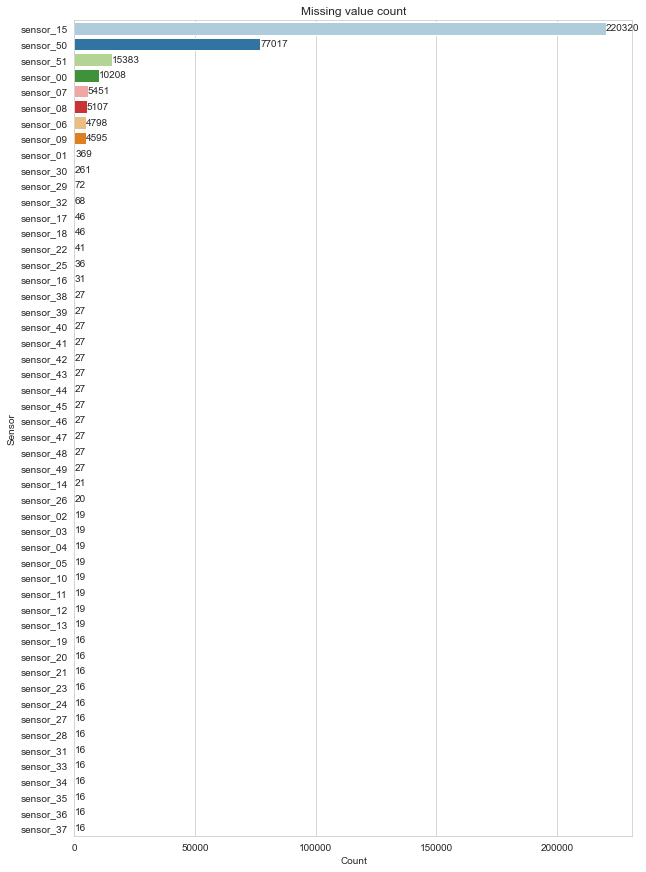

In [17]:
null_count = df.isna().sum()
null_count = null_count[2:-3] 
count_dict = {}
for i, j in zip(null_count.index, null_count.values):
    count_dict[i] = j
count_dict = {k:v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))
plot = sns.barplot(x=list(count_dict.values()), 
                   y=list(count_dict.keys()), palette='Paired')
for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5 
    _y = p.get_y() + p.get_height() - 0.25 
    value = int(p.get_width())
    plot.text(_x, _y, value, ha="left")
plot.set_title("Missing value count")
plot.set_ylabel("Sensor")
plot.set_xlabel("Count")
plt.show()

Percentage Missing Values 



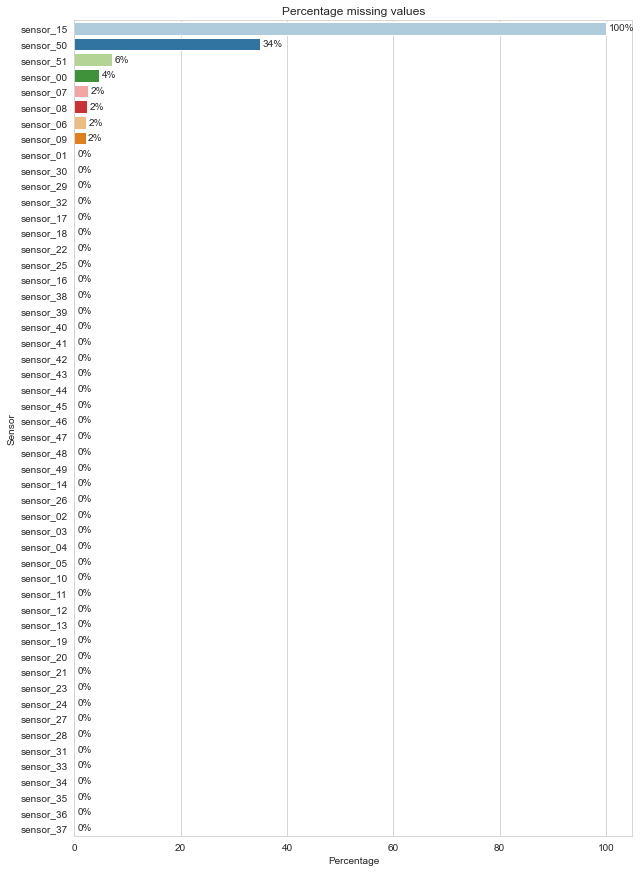

In [18]:
print("Percentage Missing Values ")
print()

# percentage null values
null_count = df.isna().sum()/df.shape[0] * 100 
null_count = null_count[2:-3] # considering only sensor columns

percent_null = {}

# creating dictionary of column and percentage null value
for i, j in zip(null_count.index, null_count.values):
    percent_null[i] = j

# sorting the dictionary
percent_null = {k:v for k, v in sorted(percent_null.items(), 
                                       key=lambda item: item[1], reverse=True)}

sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))

plot = sns.barplot(x=list(percent_null.values()), 
                   y=list(percent_null.keys()), palette='Paired')

# ref: https://stackoverflow.com/questions/43214978/seaborn-barplot-
# displaying-values/51535326#51535326
for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5
    _y = p.get_y() + p.get_height() - 0.25
    value = f'{int(p.get_width())}%'
    plot.text(_x, _y, value, ha="left")

plot.set_title("Percentage missing values")
plot.set_ylabel("Sensor")
plot.set_xlabel("Percentage")
plt.show()

### Handeling the missing value

- 100% values of sensor_15 has missibg values
- for all the other sensors the missing values are in the broken state so filling the distribution with -1

In [19]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,label,new_machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,0,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,0,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,0,NORMAL


In [20]:
df=df.drop(columns=['machine_status',
                   'new_machine_status',
                   'sensor_15'], axis=1)

df=df.drop(df.columns[0],axis=1)

for i in list(df.columns)[1:-1]:
    df[i].fillna(-1,inplace=True)

In [21]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0


In [22]:
df.shape

(220320, 53)

### Feature Engineering I

- Because of the limited data available we selected time window of 10 mins i.e given the data predict the machine status after 10 minutes therefore the data is pre-processed by shifting the labels by 10 minutes

In [23]:
def shift_label(sensor_list, df):
    
    new_features={}
    
    for sensor in sensor_list:
        new_features[sensor] = df[sensor]
        
    labels = [None] * df.shape[0]
    
    for i in range(0, df.shape[0]-10):
        labels[i]=df['label'][i+10]
    
    new_features['label'] = labels
    new_df=pd.DataFrame(new_features)
    new_df.drop(new_df.tail(10).index, inplace=True)
    
    return new_df

data_10mins_shift = shift_label(df.columns[1:-1], df)
data_10mins_shift.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0.0
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0.0
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0.0


In [24]:
data_10mins_shift.shape

(220310, 52)

#### Splitting the features into Independent and Dependent features

In [25]:
# from sklearn.model_selection import train_test_split

# X = data_10mins_shift.drop('label', axis=1)
# y = data_10mins_shift['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y, 
#                                                     test_size=0.25)

#### Feature Selection - Mutual Information Classify

In [26]:
# from sklearn.feature_selection import mutual_info_classif
# plt.figure(figsize=(20,20))
# importance=mutual_info_classif(X,y)
# feat_importance=pd.Series(importance, data_10mins_shift.columns[0:len(data_10mins_shift.columns)-1])
# feat_importance.plot(kind='barh', color='teal')

# plt.show()

#### Feature selection - Forward Feature Selection

In [27]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=340)
# model.fit(X,y)
# importance = model.feature_importances_
# final_df =  pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importance})
# final_df.set_index("Features")
# plt.figure(figsize=(20,20))
# final_df = final_df.sort_values("Features")
# final_df.plot.bar(color='teal')

In [28]:
# final_df

In [29]:
# from sklearn.ensemble import ExtraTreesClassifier
# plt.figure(figsize=(10,10))
# extra_tree_forest = ExtraTreesClassifier(n_estimators = 300,criterion ='gini', max_features = 2)

# extra_tree_forest.fit(X, y)

# # feature_importance = extra_tree_forest.feature_importances_

# # feature_importance_normalized = np.std([tree.feature_importances_ for tree in
# #                                     extra_tree_forest.estimators_],
# #                                        axis = 0)

# # plt.bar(X.columns, feature_importance_normalized)
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')

# plt.xlabel('Feature Labels')
# plt.ylabel('Feature Importances')
# plt.title('Comparison of different Feature Importances')
# plt.xticks(rotation=90)
# plt.show()

In [30]:
df_new=pd.DataFrame(data_10mins_shift[['sensor_00','sensor_10','sensor_12','sensor_13','sensor_48','sensor_04','sensor_06','sensor_11','sensor_40','sensor_49','label']])

In [31]:
df_new.head()

,sensor_00,sensor_10,sensor_12,sensor_13,sensor_48,sensor_04,sensor_06,sensor_11,sensor_40,sensor_49,label
0,2.465394,37.22740,31.11716,1.681353,157.9861,634.3750,13.41146,47.52422,70.57291,67.70834,0.0
1,2.465394,37.22740,31.11716,1.681353,157.9861,634.3750,13.41146,47.52422,70.57291,67.70834,0.0
2,2.444734,37.86777,32.08894,1.708474,155.9606,638.8889,13.32465,48.17723,69.53125,67.12963,0.0
3,2.460474,38.57977,31.67221,1.579427,155.9606,628.1250,13.31742,48.65607,72.13541,66.84028,0.0
4,2.445718,39.48939,31.95202,1.683831,158.2755,636.4583,13.35359,49.06298,76.82291,66.55093,0.0


In [32]:
df_new.shape

(220310, 11)

In [33]:
df_new = df_new.sample(frac = 1)

In [34]:
df_new.head()

,sensor_00,sensor_10,sensor_12,sensor_13,sensor_48,sensor_04,sensor_06,sensor_11,sensor_40,sensor_49,label
9910,2.406366,39.00689,32.86071,18.715450,118.34490,634.6064,13.38252,50.74007,60.15625,46.585648,0.0
89940,2.417187,45.34863,10.86370,2.355768,89.40972,634.0278,13.10040,34.46371,56.51041,53.240740,0.0
84744,2.461458,43.51870,35.34715,2.610259,276.04170,629.7454,13.59230,39.66290,55.98958,60.763889,0.0
36534,2.504745,42.69879,33.23463,3.226037,150.75230,634.4907,13.41869,49.08811,75.26041,52.372680,0.0
13185,2.410301,37.34976,28.51974,5.170439,185.47450,628.8195,13.17274,42.89801,71.35416,49.189816,0.0


In [35]:
df_new.label.value_counts()

0.0    205826
1.0     14484
Name: label, dtype: int64

In [36]:
X=df_new.drop('label',axis=1)
y=df_new['label']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.9995397219920832
	F1 score: 0.9997698080198886

Confusion Matrix: 
 [[154369      0]
 [     5  10858]]

Test Result:
accuracy score: 0.9994916300519263

Classification Report: 
 	Precision: 0.9953129307968017
	Recall Score: 0.9969621651477493
	F1 score: 0.9961368653421634

Confusion Matrix: 
 [[51440    17]
 [   11  3610]]



In [41]:
# from sklearn.svm import OneClassSVM

# svm = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03)
# svm.fit(X_train, y_train)
# print_score(tree, X_train, y_train, X_test, y_test, train=True)
# print_score(tree, X_train, y_train, X_test, y_test, train=False)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.9995397219920832
	F1 score: 0.9997698080198886

Confusion Matrix: 
 [[154369      0]
 [     5  10858]]

Test Result:
accuracy score: 0.9994916300519263

Classification Report: 
 	Precision: 0.9953129307968017
	Recall Score: 0.9969621651477493
	F1 score: 0.9961368653421634

Confusion Matrix: 
 [[51440    17]
 [   11  3610]]



In [ ]:
# X_train.columns

#### Anomaly Detection - AutoEncoders

In [ ]:
# scaler=MinMaxScaler()

# def scaleColumns(df, cols_to_scale):
#     for col in cols_to_scale:
#         df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(X_train_scaled[col])),columns=[col])
#     return df

# scaleColumns(X_train,X_train.columns)

In [ ]:
# X_train.columns

In [ ]:
# scaler = MinMaxScaler()
# data_scaled=scaler.fit(X_train)
# X_train_scaled = data_scaled.fit_transform(X_train)
# y_train_scaled = data_scaled.fit_transform(y_train)

In [ ]:
# from sklearn.ensemble import IsolationForest
# # clf=IsolationForest(n_estimators=100, max_samples='auto', \
# #                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
# # clf.fit(X)

# clf = IsolationForest()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [ ]:
# len(y_pred)

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# acc = classification_report(y_pred, y_test)

In [ ]:
# print(acc)

In [ ]:
# df_new.head()

In [ ]:
# df_new.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import IsolationForest

# normal = df_new.loc[df_new['label']==0.0]
# outliers = df_new.loc[df_new['label']==1.0]

# normal = normal.drop(['label'] , axis=1)
# outliers = outliers.drop(['label'] , axis=1)

# X_train = np.array(normal.iloc[0:220310,:])
# # X_dev = np.array(normal.iloc[205826:,:])

# X_test = np.array(outliers)

# clf = IsolationForest(max_samples=100)
# clf.fit(X_train)


In [ ]:
# y_pred_train = clf.predict(X_train)
# # y_pred_dev = clf.predict(X_dev)
# y_pred_test = clf.predict(X_test)

# # print("Accuracy dev :", list(y_pred_dev).count(1)/y_pred_dev.shape[0])
# print("Accuracy test:", list(y_pred_test).count(-1)/y_pred_test.shape[0])

In [ ]:
# y_pred_test